Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [60]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [62]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/cancer/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/cancer/Test')

In [63]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [64]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [65]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,  batch_size=batch_size, image_size=(img_height, img_width), seed=132, validation_split=0.2,
     subset="training")

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


In [67]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,  batch_size=batch_size, image_size=(img_height, img_width), seed=132, validation_split=0.2,
     subset='validation')

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [68]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

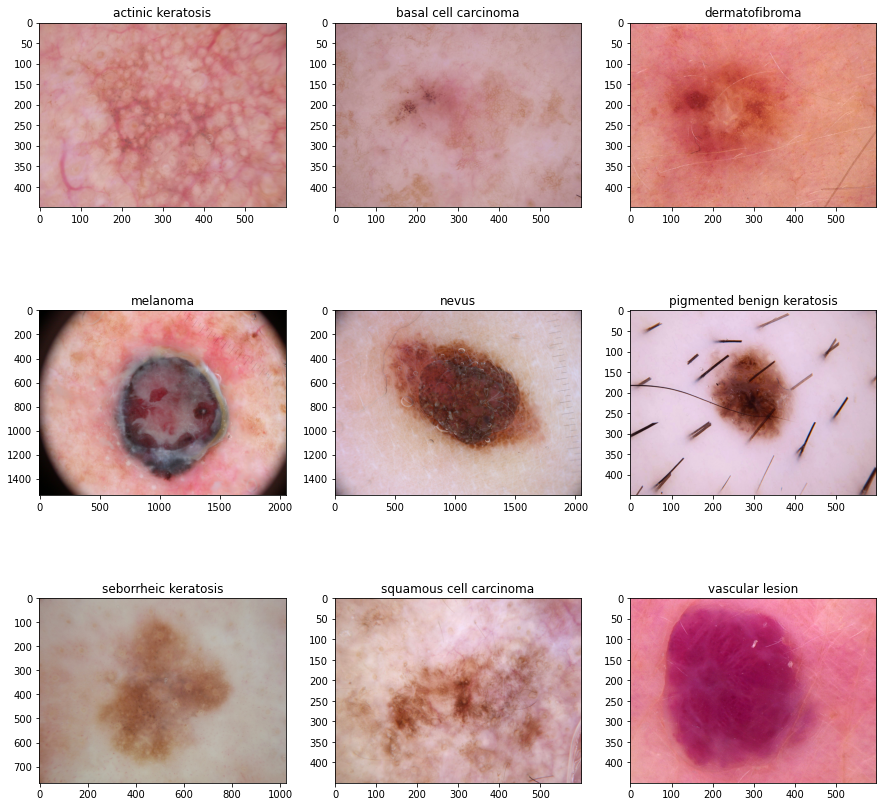

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [70]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [71]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes=9
model=Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32,kernel_size=(3,3), padding="Same", activation="relu", input_shape=(180,180,32)))
model.add(Conv2D(filters = 32,kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64,kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [72]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

### Train the model

In [74]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 217s 816ms/step - loss: 2.0474 - accuracy: 0.2006 - val_loss: 2.0304 - val_accuracy: 0.2584
Epoch 2/20
57/57 [==============================] - 3s 57ms/step - loss: 1.9352 - accuracy: 0.2550 - val_loss: 1.7406 - val_accuracy: 0.4120
Epoch 3/20
57/57 [==============================] - 3s 57ms/step - loss: 1.8200 - accuracy: 0.3311 - val_loss: 1.6693 - val_accuracy: 0.4009
Epoch 4/20
57/57 [==============================] - 3s 58ms/step - loss: 1.7225 - accuracy: 0.3706 - val_loss: 1.5716 - val_accuracy: 0.4878
Epoch 5/20
57/57 [==============================] - 3s 57ms/step - loss: 1.6221 - accuracy: 0.4217 - val_loss: 1.4867 - val_accuracy: 0.4944
Epoch 6/20
57/57 [==============================] - 3s 57ms/step - loss: 1.5438 - accuracy: 0.4500 - val_loss: 1.4857 - val_accuracy: 0.5011
Epoch 7/20
57/57 [==============================] - 3s 58ms/step - loss: 1.4766 - accuracy: 0.4867 - val_loss: 1.4539 - val_accuracy: 0.5501
Epoch 8/20

### Visualizing training results

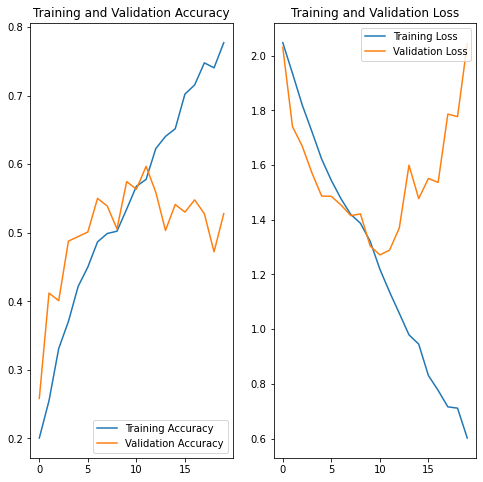

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Findings:

#### **With increasing epochs, train accuracy keeps on increasing monotically, whereas validation accuracy increases upto 10 epochs and then declines a bit.**

#### **With increasing epochs, train Loss keeps on decreasing monotically, whereas validation accuracy decreases upto 10 epochs and then increases again.**

#### The problem of overfitting is evident in the model.

In [76]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])





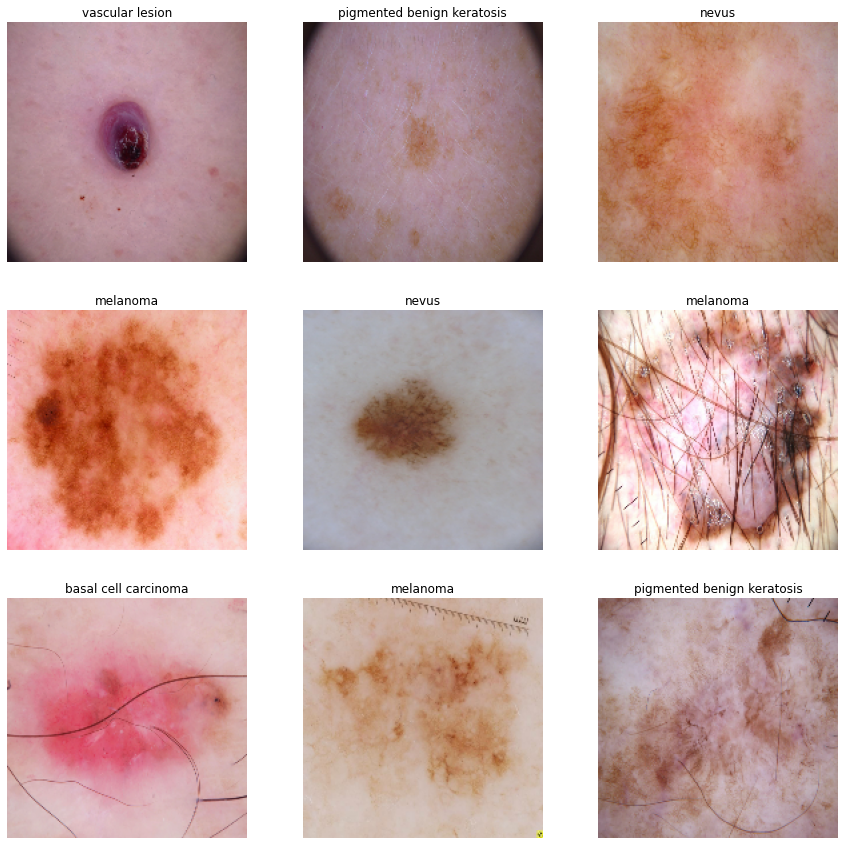

In [77]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here


plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [78]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes=9
model=Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32,kernel_size=(3,3), padding="Same", activation="relu", input_shape=(180,180,32)))
model.add(Conv2D(filters = 32,kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64,kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))


### Compiling the model

In [79]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [80]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
57/57 [==============================] - 4s 63ms/step - loss: 2.0468 - accuracy: 0.1928 - val_loss: 2.0103 - val_accuracy: 0.1938
Epoch 2/20
57/57 [==============================] - 3s 60ms/step - loss: 1.9024 - accuracy: 0.2806 - val_loss: 2.0681 - val_accuracy: 0.1849
Epoch 3/20
57/57 [==============================] - 3s 60ms/step - loss: 1.8738 - accuracy: 0.3067 - val_loss: 1.6908 - val_accuracy: 0.3675
Epoch 4/20
57/57 [==============================] - 3s 60ms/step - loss: 1.7128 - accuracy: 0.3761 - val_loss: 1.6921 - val_accuracy: 0.3519
Epoch 5/20
57/57 [==============================] - 3s 59ms/step - loss: 1.6012 - accuracy: 0.4194 - val_loss: 1.4177 - val_accuracy: 0.5367
Epoch 6/20
57/57 [==============================] - 3s 60ms/step - loss: 1.4775 - accuracy: 0.4844 - val_loss: 1.3613 - val_accuracy: 0.5390
Epoch 7/20
57/57 [==============================] - 3s 60ms/step - loss: 1.4780 - accuracy: 0.4744 - val_loss: 1.2888 - val_accuracy: 0.5702
Epoch 8/20
57

### Visualizing the results

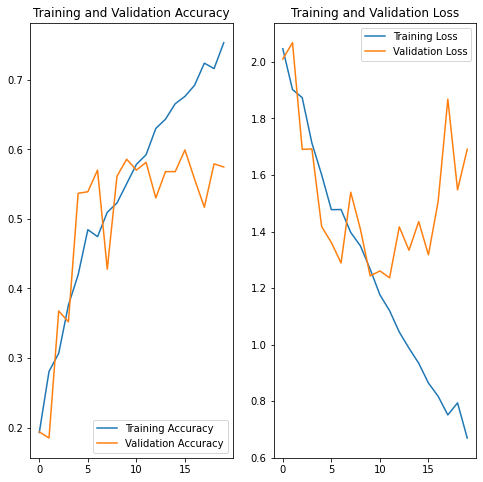

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### The model performances have marginally increased now. The losses in validation set have decreased a bit. But there still is a problem of overfitting in the model as the train set accuracy and losses are not in synchronization with that of validation set.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

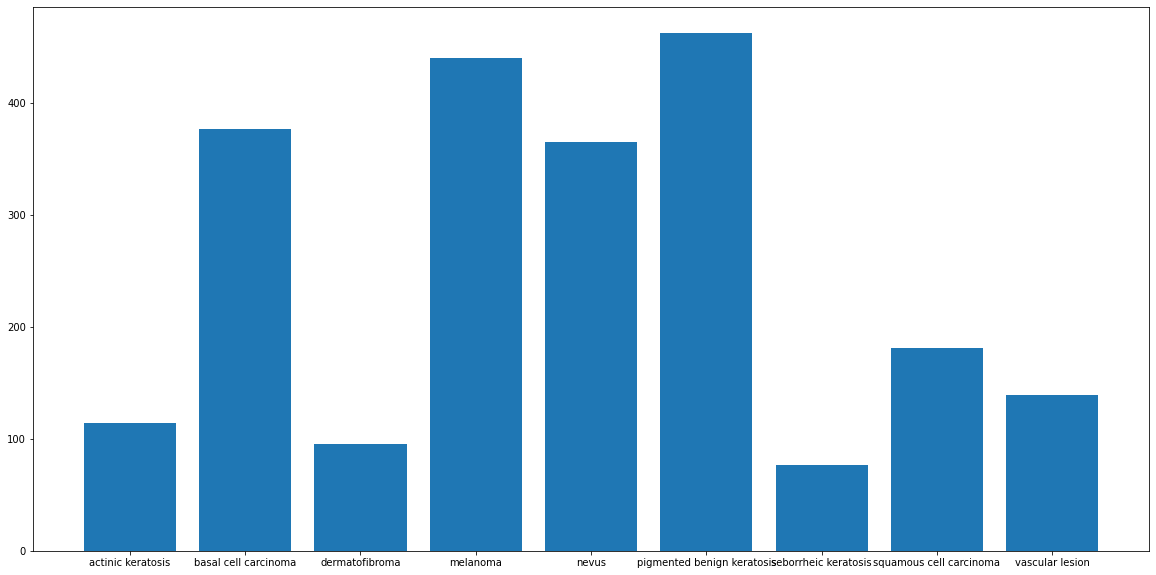

In [82]:
## Your code goes here.
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(20,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

Ans: **"Seborrheic Keratosis" has least number of samples.**

#### - Which classes dominate the data in terms proportionate number of samples?

Ans: "Pigmented benign keratosis" followed by "melanoma" dominate the data in terms proportionate number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [83]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/cancer/Train/actinic k...,actinic keratosis
1,/content/gdrive/MyDrive/cancer/Train/actinic k...,actinic keratosis
2,/content/gdrive/MyDrive/cancer/Train/actinic k...,actinic keratosis
3,/content/gdrive/MyDrive/cancer/Train/actinic k...,actinic keratosis
4,/content/gdrive/MyDrive/cancer/Train/actinic k...,actinic keratosis
...,...,...
2244,/content/gdrive/MyDrive/cancer/Train/vascular ...,vascular lesion
2245,/content/gdrive/MyDrive/cancer/Train/vascular ...,vascular lesion
2246,/content/gdrive/MyDrive/cancer/Train/vascular ...,vascular lesion
2247,/content/gdrive/MyDrive/cancer/Train/vascular ...,vascular lesion


In [84]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [85]:
path_to_training_dataset="/content/gdrive/MyDrive/cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F164AA56DF0>: 100%|██████████| 500/500 [00:21<00:00, 23.32 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F164AA00FD0>: 100%|██████████| 500/500 [00:23<00:00, 21.53 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F164AA87340>: 100%|██████████| 500/500 [00:18<00:00, 26.88 Samples/s]


Initialised with 440 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F164AD73280>: 100%|██████████| 500/500 [01:37<00:00,  5.12 Samples/s]


Initialised with 365 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F16D54095B0>: 100%|██████████| 500/500 [01:33<00:00,  5.35 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16C81A1F40>: 100%|██████████| 500/500 [00:19<00:00, 25.24 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F164AC0B100>: 100%|██████████| 500/500 [00:44<00:00, 11.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F16C813C310>: 100%|██████████| 500/500 [00:20<00:00, 24.46 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F164AC49D90>: 100%|██████████| 500/500 [00:17<00:00, 27.96 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [86]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [87]:
import glob

In [88]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030408.jpg_05f6825d-7dce-4213-9f0f-dd84823b7c74.jpg',
 '/content/gdrive/MyDrive/cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026457.jpg_c9870782-0953-4856-8899-2859dffbadc2.jpg',
 '/content/gdrive/MyDrive/cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030826.jpg_09ffe049-cf64-4ab1-a7be-f38a3a477f37.jpg',
 '/content/gdrive/MyDrive/cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030344.jpg_e91ed939-2afa-47b3-ae92-becf8cca9392.jpg',
 '/content/gdrive/MyDrive/cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030036.jpg_27e2df7a-625c-4147-ae72-339928db2687.jpg',
 '/content/gdrive/MyDrive/cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029830.jpg_3582e69c-f1f7-43a4-8e5f-7d3d5c641d02.jpg',
 '/content/gdrive/MyDrive/cancer/Train/actinic keratosis/output/actinic keratosis_original_ISI

In [89]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [90]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [91]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [92]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      940
basal cell carcinoma          876
nevus                         865
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [93]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [94]:
data_dir_train="/content/gdrive/MyDrive/cancer/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 5400 files for training.


#### **Todo:** Create a validation dataset

In [95]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [96]:
## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(Conv2D(filters = 64,kernel_size=(3,3), padding="Same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [97]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [98]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 45s 252ms/step - loss: 1.8381 - accuracy: 0.2978 - val_loss: 1.6536 - val_accuracy: 0.3766
Epoch 2/50
169/169 [==============================] - 34s 194ms/step - loss: 1.5033 - accuracy: 0.4322 - val_loss: 1.3740 - val_accuracy: 0.4878
Epoch 3/50
169/169 [==============================] - 33s 190ms/step - loss: 1.3503 - accuracy: 0.4907 - val_loss: 1.3824 - val_accuracy: 0.4937
Epoch 4/50
169/169 [==============================] - 36s 202ms/step - loss: 1.2419 - accuracy: 0.5417 - val_loss: 1.1850 - val_accuracy: 0.5389
Epoch 5/50
169/169 [==============================] - 33s 189ms/step - loss: 1.1038 - accuracy: 0.5924 - val_loss: 1.2045 - val_accuracy: 0.5604
Epoch 6/50
169/169 [==============================] - 33s 188ms/step - loss: 1.0269 - accuracy: 0.6256 - val_loss: 1.1403 - val_accuracy: 0.5804
Epoch 7/50
169/169 [==============================] - 33s 186ms/step - loss: 0.9390 - accuracy: 0.6600 - val_loss: 1.1109 - val_accuracy: 0.5

#### **Todo:**  Visualize the model results

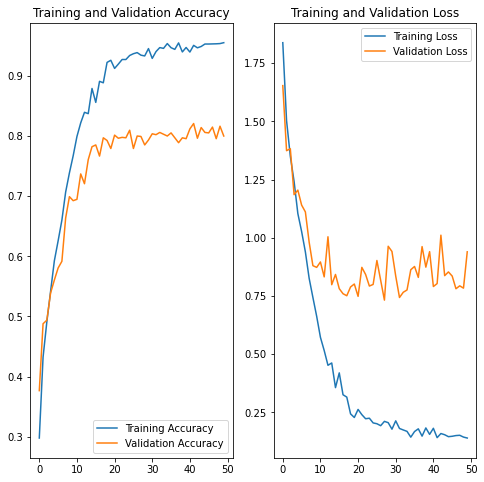

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

#### **The train and validation accuracies have increased after the appropriate augmentation. The validation accuracies have seen much more improvement after class balancing.**

#### The losses have reduced after class balancing in both train and validation sets. The validation error decreases upto 10 epochs and then tends to be more asymptotic.


**From the plots it is clear that the train and validation sets do not show problems of underfitting or overfitting and these problems that were seen in the past cases have been effectively handled by class balancing.**
